In [90]:
import pandas as pd
from pandas import Series,DataFrame
import numpy

In [93]:
    countries = ['Russian Fed.', 'Norway', 'Canada', 'United States',
                 'Netherlands', 'Germany', 'Switzerland', 'Belarus',
                 'Austria', 'France', 'Poland', 'China', 'Korea', 
                 'Sweden', 'Czech Republic', 'Slovenia', 'Japan',
                 'Finland', 'Great Britain', 'Ukraine', 'Slovakia',
                 'Italy', 'Latvia', 'Australia', 'Croatia', 'Kazakhstan']

    gold = [13, 11, 10, 9, 8, 8, 6, 5, 4, 4, 4, 3, 3, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0]
    silver = [11, 5, 10, 7, 7, 6, 3, 0, 8, 4, 1, 4, 3, 7, 4, 2, 4, 3, 1, 0, 0, 2, 2, 2, 1, 0]
    bronze = [9, 10, 5, 12, 9, 5, 2, 1, 5, 7, 1, 2, 2, 6, 2, 4, 3, 1, 2, 1, 0, 6, 2, 1, 0, 1]
 
    # YOUR CODE HERE
    point_metric = [4,2,1]
    df = DataFrame({"gold":gold,"silver":silver,"bronze":bronze})
    olympic_points_df = numpy.dot(df,point_metric)
    olympic_points_df

array([73, 67, 50, 73, 59, 42, 23, 14, 36, 40, 13, 18, 17, 35, 16, 22, 18,
        9, 11,  6,  2, 26, 10,  6,  1,  4])

In [5]:
admiss = pd.read_csv("Berkeley.csv")

In [9]:
admiss.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 4 columns):
Admit     24 non-null object
Gender    24 non-null object
Dept      24 non-null object
Freq      24 non-null int64
dtypes: int64(1), object(3)
memory usage: 840.0+ bytes


In [14]:
admiss.tail(10)

,Admit,Gender,Dept,Freq
14,Admitted,Female,D,131
15,Rejected,Female,D,244
16,Admitted,Male,E,53
17,Rejected,Male,E,138
18,Admitted,Female,E,94
19,Rejected,Female,E,299
20,Admitted,Male,F,22
21,Rejected,Male,F,351
22,Admitted,Female,F,24
23,Rejected,Female,F,317


In [47]:
dept_sum = admiss.groupby("Dept").sum()
dept_sum = dept_sum.reset_index()
dept_sum = dept_sum.rename(columns={"Freq":"Freq_Dept_Sum"})
dept_sum

,Dept,Freq_Dept_Sum
0,A,933
1,B,585
2,C,918
3,D,792
4,E,584
5,F,714


In [48]:
dept_sum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 2 columns):
Dept             6 non-null object
Freq_Dept_Sum    6 non-null int64
dtypes: int64(1), object(1)
memory usage: 168.0+ bytes


In [68]:
merged = pd.merge(admiss,dept_sum,on="Dept",how="inner")
merged.head()

,Admit,Gender,Dept,Freq,Freq_Dept_Sum
0,Admitted,Male,A,512,933
1,Rejected,Male,A,313,933
2,Admitted,Female,A,89,933
3,Rejected,Female,A,19,933
4,Admitted,Male,B,353,585


In [67]:
ratio = merged["Freq"]/merged["Freq_Dept_Sum"]
ratio_frame = ratio.to_frame(name="Ratio")
ratio_frame.head()

,Ratio
0,0.548767
1,0.335477
2,0.095391
3,0.020364
4,0.603419


In [69]:
merged = merged.merge(ratio_frame,left_index=True,right_index=True)
merged.head()

,Admit,Gender,Dept,Freq,Freq_Dept_Sum,Ratio
0,Admitted,Male,A,512,933,0.548767
1,Rejected,Male,A,313,933,0.335477
2,Admitted,Female,A,89,933,0.095391
3,Rejected,Female,A,19,933,0.020364
4,Admitted,Male,B,353,585,0.603419


In [77]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

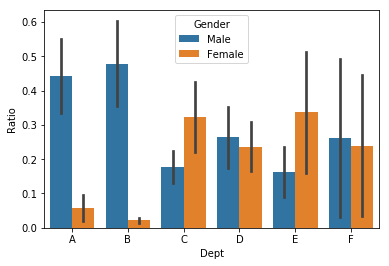

In [83]:
sns.barplot(x="Dept", y="Ratio", hue="Gender", data=merged);

# Simpson's Paradox
http://vudlab.com/simpsons/

![Simpson's Paradox](Simpson.png)